Dependencies

In [37]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Removing dodgy images

In [38]:
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [39]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [40]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Load Data

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
import os

def check_file_names(directory):
    for root, dirs, files in os.walk(directory):
        for name in files + dirs:
            try:
                name.encode('utf-8')
            except UnicodeEncodeError:
                print(f"Non-UTF-8 file or directory name: {os.path.join(root, name)}")

check_file_names('data')

In [48]:
import cv2
import matplotlib.pyplot as plt

def show_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.title(image_path)
        plt.show()
    else:
        print(f"❌ Unable to read: {image_path}")

data_dir = "data"

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        if img is None:  # Image is unreadable
            print(f"❌ Corrupted image: {file_path}")
            show_image(file_path)  # Show the image


In [42]:
import tensorflow as tf

def safe_image_dataset_from_directory(directory):
    try:
        return tf.keras.utils.image_dataset_from_directory(directory)
    except UnicodeDecodeError as e:
        print(f"Skipping problematic file: {e}")
        return None

data = safe_image_dataset_from_directory('data')

Skipping problematic file: 'utf-8' codec can't decode byte 0xe1 in position 62: invalid continuation byte


In [44]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"Problematic file: {os.path.join(root, file)}")


In [45]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"🚨 Problematic file: {os.path.join(root, file)}")


In [49]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 706 files belonging to 2 classes.


In [50]:
data_iterator = data.as_numpy_iterator()

In [51]:
batch = data_iterator.next()

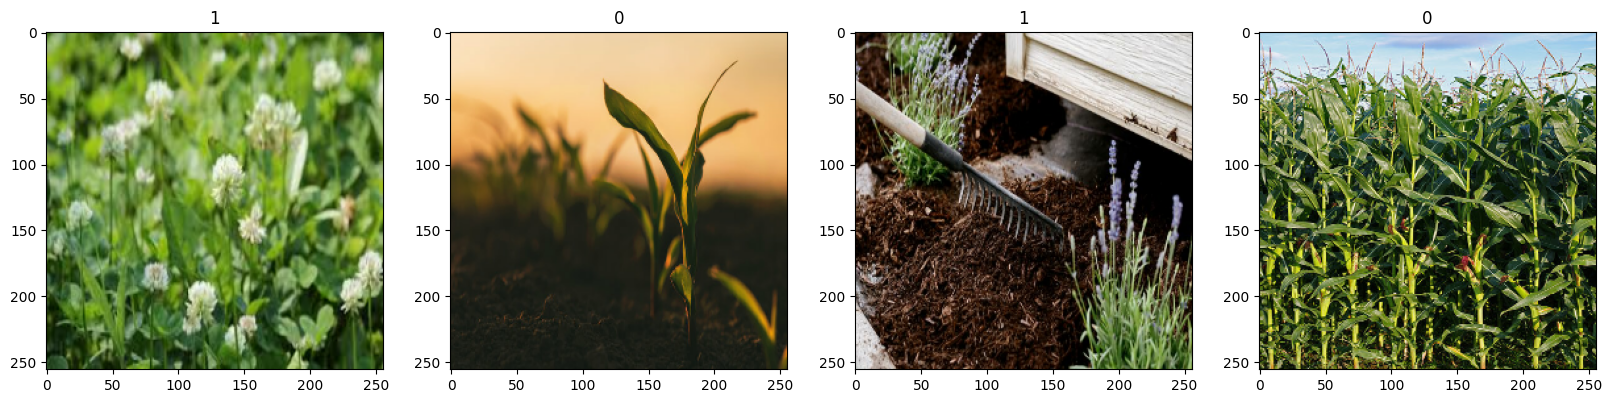

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Data Preprocessing

Scale Data

In [54]:
data = data.map(lambda x,y: (x/255, y))

In [55]:
data.as_numpy_iterator().next()

(array([[[[3.59369725e-01, 4.22114819e-01, 1.67212874e-01],
          [3.10868561e-01, 3.73613656e-01, 1.18711703e-01],
          [3.06456804e-01, 3.69201899e-01, 1.23368569e-01],
          ...,
          [4.24108177e-01, 4.48863059e-01, 3.13054830e-01],
          [4.63472247e-01, 5.00482082e-01, 3.65686268e-01],
          [6.05175316e-01, 6.71351790e-01, 5.45616508e-01]],
 
         [[3.46829057e-01, 4.13250625e-01, 1.47319242e-01],
          [2.96338856e-01, 3.59083951e-01, 1.04181983e-01],
          [2.91927069e-01, 3.54672194e-01, 1.07613355e-01],
          ...,
          [4.34522927e-01, 4.57598031e-01, 3.28387797e-01],
          [4.52458650e-01, 4.89468455e-01, 3.56870413e-01],
          [6.04174316e-01, 6.70350790e-01, 5.44615507e-01]],
 
         [[3.29515636e-01, 4.07947004e-01, 1.37358785e-01],
          [2.81617641e-01, 3.60049009e-01, 8.94607827e-02],
          [2.77205884e-01, 3.51715684e-01, 9.28921551e-02],
          ...,
          [4.31548715e-01, 4.53607529e-01, 3.2861

Split Data

In [58]:
len(data)

23

In [56]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [63]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [70]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [80]:
model = Sequential()

In [81]:
#
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuaracy'])

AttributeError: 'str' object has no attribute 'optimizer'

In [ ]:
model.summary()